In [6]:
import os
import random as rnd
import cv2
import numpy as np
import pandas as pd
from urllib.request import urlopen
from random import randint
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [28]:
logos_pathes = ['/content/drive/MyDrive/logo_dataset/logos/'+el for el in os.listdir('/content/drive/MyDrive/logo_dataset/logos')]

In [29]:
backgrounds_pathes = ['/content/drive/MyDrive/logo_dataset/backgrounds/'+el for el in os.listdir('/content/drive/MyDrive/logo_dataset/backgrounds')]

In [22]:
def make_logo_roi(logo_path: str, background_path: str, xy_offset: tuple[int]) -> tuple:
  logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)
  logo = cv2.resize(logo, (200, 150), cv2.INTER_AREA)

  background = cv2.imread(background_path)
  background = cv2.cvtColor(background, cv2.COLOR_RGB2RGBA)
  background = cv2.resize(background, (800, 600), cv2.INTER_AREA)

  x_offset, y_offset = xy_offset
  x_end, y_end = (x_offset + logo.shape[1], y_offset + logo.shape[0])

  rows,columns,channels = logo.shape
  roi = background[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]]

  ret, mask = cv2.threshold(logo[:, :, 3], 0, 255, cv2.THRESH_BINARY)
  bg = cv2.bitwise_or(roi,roi,mask = cv2.bitwise_not(mask))
  fg = cv2.bitwise_and(logo,logo, mask=mask)

  final_roi = cv2.add(bg,fg)

  return (y_offset, y_end, x_offset, x_end, final_roi)

In [23]:
def make_sample(background_path: str, roi: tuple, save_path: str, cls: int) -> None:
    background = cv2.imread(background_path)
    background = cv2.cvtColor(background, cv2.COLOR_RGB2RGBA)
    background = cv2.resize(background, (800, 600), cv2.INTER_AREA)
    background[roi[0] : roi[1], roi[2] : roi[3]]= roi[4]

    label = open(f"/content/dataset/{save_path}.txt", "w+")
    x_center = ((roi[2] + roi[3]) / 2) / background.shape[1]
    y_center = ((roi[0] + roi[1]) / 2) / background.shape[0]
    norm_width = (roi[3] - roi[2]) / background.shape[1]
    norm_height = (roi[1] - roi[0]) / background.shape[0]
    label.write(f"{cls} {x_center} {y_center} {norm_width} {norm_height}\n")
    label.close()

    cv2.imwrite(f"/content/dataset/{save_path}.png", background)

In [134]:
os.mkdir('/content/dataset/')
os.mkdir('/content/dataset/train')
os.mkdir('/content/dataset/val')

In [138]:
classes = {
    0: 'tinkoff',
    1: 'naumen',
    2: 'ussc',
    3: 'rostelecom',
    4: 'sber',
    5: 'gosuslugi'
}

In [ ]:
#p_x <= 600
#p_y <= 450

In [225]:
for el in os.listdir('/content/dataset/train'):
  os.remove('/content/dataset/train/'+el)

In [ ]:
for el in os.listdir('/content/dataset/val'):
  os.remove('/content/dataset/val/'+el)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


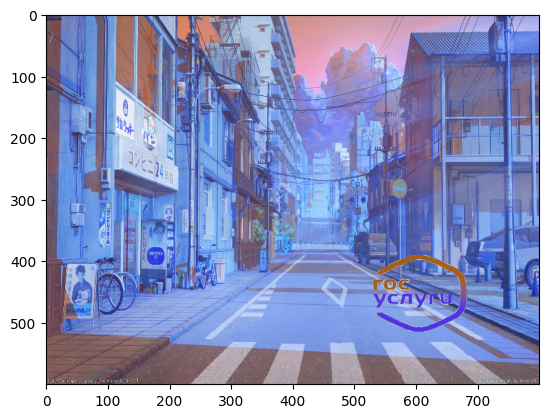

In [226]:
#for train
i = -1
for skrr in range(len(logos_pathes)):
  for j in range(6):
    i += 1
    roi = make_logo_roi(logos_pathes[skrr], backgrounds_pathes[j], (randint(0,600), randint(0,450)))
    make_sample(backgrounds_pathes[j], roi, f'train/sample_{i}', skrr)
    print(i)

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


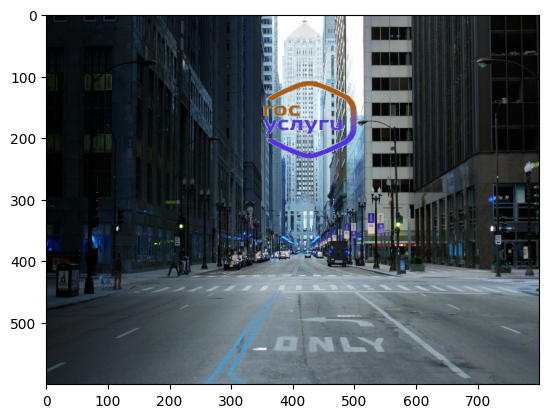

In [227]:
#for val
i = 35
for skrr in range(len(logos_pathes)):
  for j in range(6, len(backgrounds_pathes)):
    i += 1
    roi = make_logo_roi(logos_pathes[skrr], backgrounds_pathes[j], (randint(0,600), randint(0,450)))
    make_sample(backgrounds_pathes[j], roi, f'val/sample_{i}', skrr)
    print(i)

In [ ]:
!zip -r dataset.zip /content/dataset/

In [230]:
from google.colab import files
files.download('dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
roi = make_logo_roi(logos_pathes[2], backgrounds_pathes[3], (randint(0,600), randint(0,450)))
make_sample(backgrounds_pathes[3], roi, f'test2', 2)

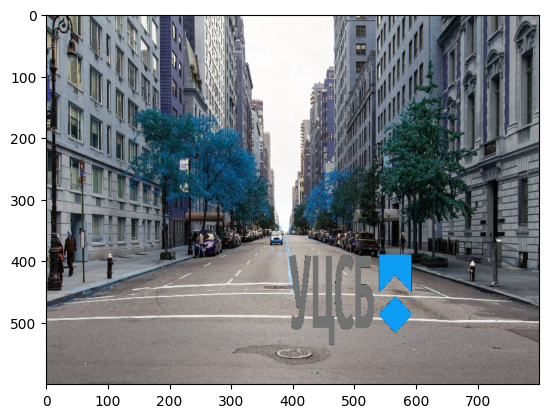

In [31]:
plt.imshow(cv2.imread('/content/dataset/test2.png'))

# Train YOLO v8 on custom Dataset

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.8/615.8 kB 13.0 MB/s eta 0:00:00


In [38]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8m.pt')

In [3]:
!unzip dataset.zip -d /content/

Archive:  dataset.zip
   creating: /content/dataset/
   creating: /content/dataset/train/
  inflating: /content/dataset/train/sample_0.png  
  inflating: /content/dataset/train/sample_0.txt  
  inflating: /content/dataset/train/sample_1.png  
  inflating: /content/dataset/train/sample_1.txt  
  inflating: /content/dataset/train/sample_10.png  
  inflating: /content/dataset/train/sample_10.txt  
  inflating: /content/dataset/train/sample_11.png  
  inflating: /content/dataset/train/sample_11.txt  
  inflating: /content/dataset/train/sample_12.png  
  inflating: /content/dataset/train/sample_12.txt  
  inflating: /content/dataset/train/sample_13.png  
  inflating: /content/dataset/train/sample_13.txt  
  inflating: /content/dataset/train/sample_14.png  
  inflating: /content/dataset/train/sample_14.txt  
  inflating: /content/dataset/train/sample_15.png  
  inflating: /content/dataset/train/sample_15.txt  
  inflating: /content/dataset/train/sample_16.png  
  inflating: /content/dataset/

In [39]:
results = model.train(
   data='data.yaml',
   epochs=25,
   batch=16,
   name='gryass'
)

Ultralytics YOLOv8.0.191 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=gryass, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

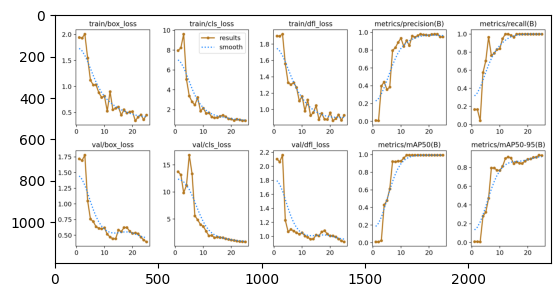

In [40]:
plt.imshow(cv2.imread('/content/runs/detect/gryass2/results.png'))

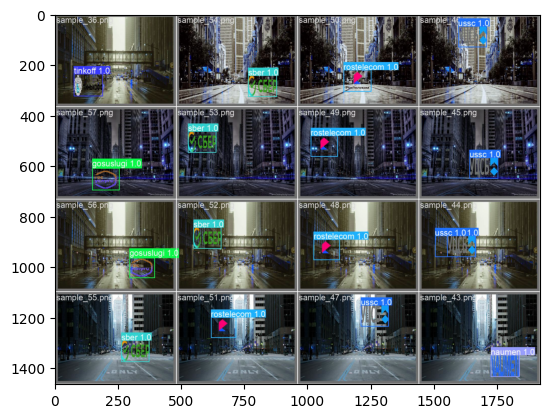

In [41]:
plt.imshow(cv2.imread('/content/runs/detect/gryass2/val_batch0_pred.jpg'))

In [42]:
model.val()

Ultralytics YOLOv8.0.191 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/dataset/val.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]
                   all         24         24       0.95          1      0.995      0.924
               tinkoff         24          4      0.987          1      0.995      0.964
                naumen         24          4       0.96          1      0.995      0.995
                  ussc         24          4      0.791          1      0.995      0.995
            rostelecom         24          4      0.984          1      0.995      0.802
                  sber         24          4      0.986          1      0.995      0.995
             gosuslugi         24       

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff4f86d14e0>
fitness: 0.9308021802490096
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.96379,       0.995,       0.995,     0.80187,       0.995,     0.79136])
names: {0: 'tinkoff', 1: 'naumen', 2: 'ussc', 3: 'rostelecom', 4: 'sber', 5: 'gosuslugi'}
plot: True
results_dict: {'metrics/precision(B)': 0.949796269209383, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9236690891655662, 'fitness': 0.9308021802490096}
save_dir: PosixPath('runs/detect/gryass3')
speed: {'preprocess': 9.07212495803833, 'inference': 24.841169516245525, 'loss': 0.0014503796895345051, 'postprocess': 2.7705729007720947}

In [44]:
terminator2004 = YOLO('/content/runs/detect/gryass2/weights/best.pt')

In [54]:
terminator2004.predict('/content/test1.jpeg', save=True)


image 1/1 /content/test1.jpeg: 448x640 (no detections), 134.2ms
Speed: 3.8ms preprocess, 134.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'tinkoff', 1: 'naumen', 2: 'ussc', 3: 'rostelecom', 4: 'sber', 5: 'gosuslugi'}
 orig_img: array([[[233, 237, 238],
         [233, 237, 238],
         [233, 237, 238],
         ...,
         [235, 237, 238],
         [235, 237, 238],
         [235, 237, 238]],
 
        [[233, 237, 238],
         [233, 237, 238],
         [233, 237, 238],
         ...,
         [235, 237, 238],
         [235, 237, 238],
         [235, 237, 238]],
 
        [[233, 237, 238],
         [233, 237, 238],
         [233, 237, 238],
         ...,
         [235, 237, 238],
         [235, 237, 238],
         [235, 237, 238]],
 
        ...,
 
        [[128, 142, 160],
         [128, 142, 160],
         [128, 142, 160],
         ...,
         [168, 180, 198],
         [169, 181, 199],
         [169, 181, 199]],
 
        [[129, 143, 161],
         [128, 142, 160],


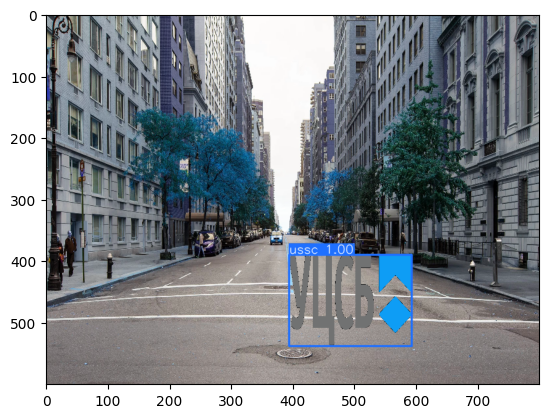

In [56]:
plt.imshow(cv2.imread('/content/runs/detect/predict/test2.png'))

In [34]:
b = model(['/content/dataset/test2.png'])


0: 480x640 (no detections), 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
